In [17]:
from keras.datasets import boston_housing
from keras.layers import Dense
from keras.models import Sequential
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

(X_train, y_train), (X_test, y_test) = boston_housing.load_data()

# Feature scaling.
ss = StandardScaler().fit(X_train)
X_train_scaled = ss.transform(X_train)
X_test_scaled = ss.transform(X_test)

# A two-layer model should be sufficient, since more layers just means a more potent (and less diverse) "filter." 
# Most boston_housing networks I've seen use less output space, but kind of curious to try these larger layers.
model = Sequential()
model.add(Dense(512, activation='relu'))
model.add(Dense(32, activation='relu'))

# Compiling and fitting.
model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
history = model.fit(X_train_scaled, y_train, epochs=125, validation_split=0.2)

Epoch 1/125
11/11 [==============================] - 1s 19ms/step - loss: 538.9689 - mae: 21.4933 - val_loss: 579.0001 - val_mae: 22.2481
Epoch 2/125
11/11 [==============================] - 0s 5ms/step - loss: 496.6822 - mae: 20.2102 - val_loss: 507.8748 - val_mae: 20.6584
Epoch 3/125
11/11 [==============================] - 0s 6ms/step - loss: 401.1855 - mae: 18.0161 - val_loss: 426.8315 - val_mae: 18.7087
Epoch 4/125
11/11 [==============================] - 0s 6ms/step - loss: 349.6229 - mae: 16.7631 - val_loss: 345.7678 - val_mae: 16.4991
Epoch 5/125
11/11 [==============================] - 0s 8ms/step - loss: 263.4543 - mae: 14.1063 - val_loss: 266.3621 - val_mae: 13.9540
Epoch 6/125
11/11 [==============================] - 0s 6ms/step - loss: 199.3239 - mae: 12.0314 - val_loss: 202.4302 - val_mae: 11.5571
Epoch 7/125
11/11 [==============================] - 0s 7ms/step - loss: 138.8519 - mae: 9.9559 - val_loss: 163.4622 - val_mae: 9.9900
Epoch 8/125
11/11 [=======================

In [18]:
# As it turns out, it doesn't perform much worse than a three-layer network. Three layers seems to be the magic number,
# but the model performs relatively well on both training and validation data with just two.
mse, mae = model.evaluate(X_test_scaled, y_test)

4/4 [==============================] - 0s 3ms/step - loss: 22.4238 - mae: 2.8567


In [19]:
print("MAE: %.2f" % mae)

MAE: 2.86


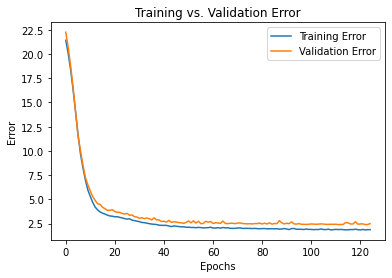

In [20]:
plt.plot(history.history['mae'], label='Training Error')
plt.plot(history.history['val_mae'], label='Validation Error')
plt.title("Training vs. Validation Error")
plt.xlabel("Epochs")
plt.ylabel("Error")
plt.legend()
plt.show()